#Tutorial 7

#CSC420 - Fall 2021

#Babak Taati

In [1]:
# install OpenCV
!pip install opencv-python

# the usual ...
%matplotlib inline
import matplotlib.pyplot as plt
import cv2
import numpy as np

In [2]:
# read an image (make sure CavePainting.jpg is in the main folder in your Google Drive)
# img = cv2.imread('./images/Window2.jpg') # READS IN NUMPY ARRAY
img = cv2.imread('./images/Corners2.png') # READS IN NUMPY ARRAY

In [3]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

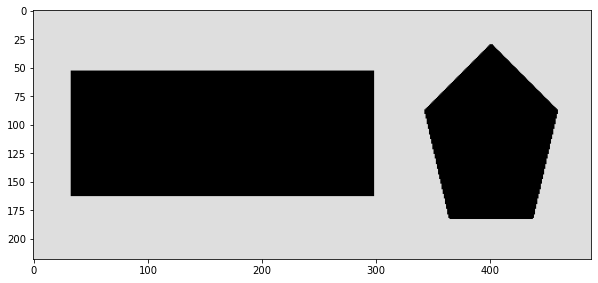

In [4]:
plt.figure(figsize=(10,10))
plt.imshow(img)

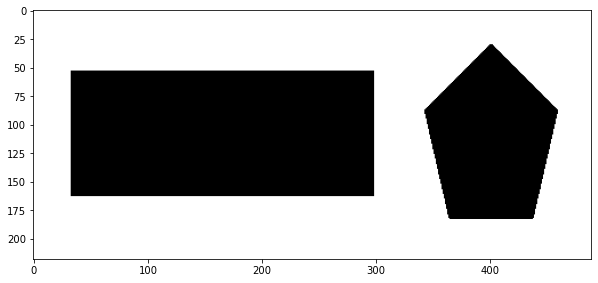

In [6]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
#gray = cv2.bitwise_not(gray)
#gray = gray*1.1
plt.figure(figsize=(10,10))
plt.imshow(gray, cmap='gray')
blur = cv2.GaussianBlur(gray,(5,5),7)
Ix = cv2.Sobel(blur, cv2.CV_64F, 1, 0, ksize=5)
Iy = cv2.Sobel(blur, cv2.CV_64F, 0, 1, ksize=5)

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x269f59aaeb0>)

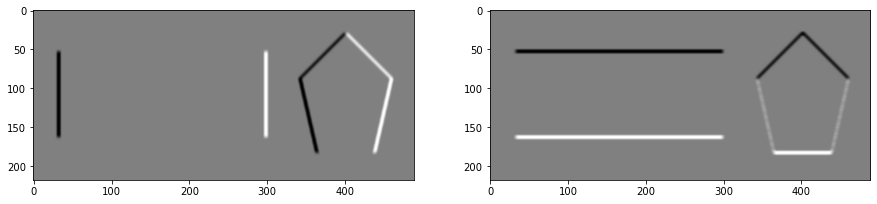

In [7]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(Ix,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(Iy,cmap = 'gray')


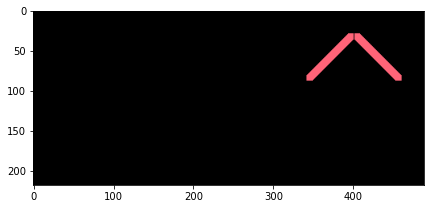

In [8]:
# don't do it this way!
cx = np.zeros(img.shape, np.uint8)
cy = np.zeros(img.shape, np.uint8)

cx[abs(Ix)>4312] = [255, 100, 120] # try thresholds of 4311 and 4312 (for Corners2.png)
cy[abs(Iy)>4312] = [255, 100, 120]
c = cv2.bitwise_and(cx, cy)
c = cv2.dilate(c, None, iterations = 3)

plt.figure(figsize=(7,7))
plt.imshow(c)

In [9]:
# do it this way
IxIy = np.multiply(Ix, Iy)
Ix2 = np.multiply(Ix, Ix)
Iy2 = np.multiply(Iy, Iy)

In [10]:
Ix2_blur = cv2.GaussianBlur(Ix2,(7,7),10) 
Iy2_blur = cv2.GaussianBlur(Iy2,(7,7),10) 
IxIy_blur = cv2.GaussianBlur(IxIy,(7,7),10) 

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x269f6b49cd0>)

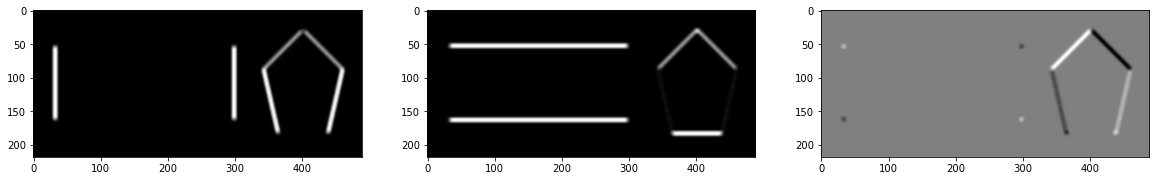

In [11]:
plt.figure(figsize=(20,20))
plt.subplot(1,3,1), plt.imshow(Ix2_blur,cmap = 'gray')
plt.subplot(1,3,2), plt.imshow(Iy2_blur,cmap = 'gray')
plt.subplot(1,3,3), plt.imshow(IxIy_blur,cmap = 'gray')


In [12]:
det = np.multiply(Ix2_blur, Iy2_blur) - np.multiply(IxIy_blur,IxIy_blur)
trace = Ix2_blur + Iy2_blur

(<AxesSubplot:>, <matplotlib.image.AxesImage at 0x269f6bd4ca0>)

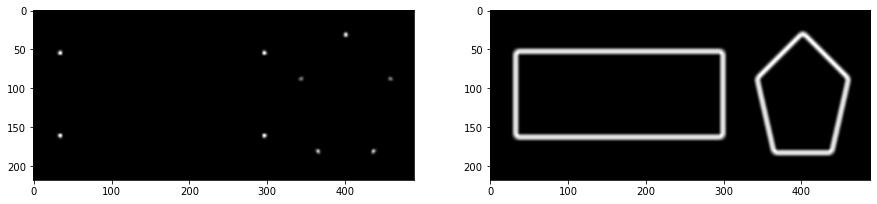

In [13]:
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(det,cmap = 'gray')
plt.subplot(1,2,2), plt.imshow(trace,cmap = 'gray')

(<AxesSubplot:>,
 (-0.5, 488.5, 217.5, -0.5))

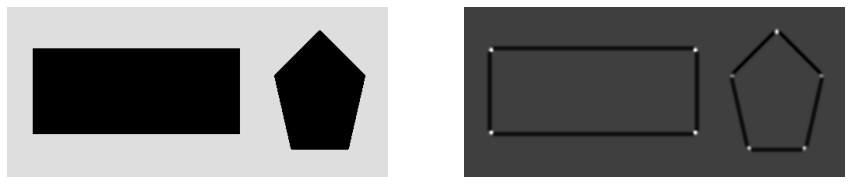

In [14]:
R = det - 0.05 * np.multiply(trace,trace)
plt.figure(figsize=(15,15))
plt.subplot(1,2,1), plt.imshow(img), plt.axis('off')
plt.subplot(1,2,2), plt.imshow(R,cmap = 'gray'), plt.axis('off')

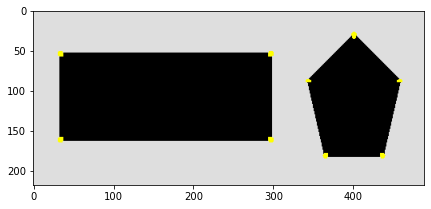

In [15]:
# show the original image, 
img2 = img.copy()
img2[R > 0.05 * R.max()]=[255, 255, 0] 
plt.figure(figsize=(7,7))
plt.imshow(img2)

In [ ]:
# See also:
#    cornerHarris
#    cornerEigenValsAndVecs
#    cornerSubPix
#    goodFeaturesToTrack   # finds N strongest corners in the image by Shi-Tomasi method or Harris Corner Detection (list of image points instead of image)

In [ ]:
# using cornerHarris
corners = cv2.cornerHarris(np.float32(gray),3,3,0.05)
plt.figure(figsize=(7,7))
plt.imshow(corners, cmap = 'gray')

In [ ]:
# dilate the corners 
corners = cv2.dilate(corners, None, iterations = 5) 
  
# show the original image, 
img3 = img.copy()
img3[corners > 0.05 * corners.max()]=[255, 255, 100] 
plt.figure(figsize=(7,7))
plt.imshow(img3)  

let's try a real image

In [ ]:
img = cv2.imread('/content/drive/My Drive/skyline.jpg') 
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=(7,7))
plt.imshow(gray, cmap='gray')
plt.xticks([]), plt.yticks([])

In [ ]:
corners = cv2.cornerHarris(src=np.float32(gray),blockSize=5,ksize=5,k=0.04)
plt.figure(figsize=(7,7))
plt.imshow(corners, cmap = 'gray')

In [ ]:
plt.figure(figsize=(7,7))
plt.imshow(corners>(0.05 * corners.max()),cmap='gray')

In [ ]:
# kernel = np.ones((3,3),np.uint8)
# dilated_corners = cv2.dilate(corners, kernel, iterations=3)
dilated_corners = cv2.dilate(corners, None)
plt.figure(figsize=(7,7))
plt.imshow(dilated_corners,cmap='gray')
plt.imshow(dilated_corners>(0.05 * corners.max()),cmap='gray')

In [ ]:
gray2 = gray.copy()
gray2[dilated_corners>(0.05 * corners.max())] = 255
plt.figure(figsize=(15,15))
plt.imshow(gray2,cmap='gray')
plt.xticks([]), plt.yticks([])

In [ ]:
# let's see it in colour
# (why does this work?)
img2 = img.copy()
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img2[dilated_corners>(0.05 * corners.max())] = [150,255,150]
plt.figure(figsize=(15,15))
plt.imshow(img2,cmap='gray')
plt.xticks([]), plt.yticks([])

# Shi-Thomasi corner detector

In [ ]:
corners = cv2.goodFeaturesToTrack(gray, maxCorners=100, qualityLevel=0.01, minDistance=10)
corners

In [ ]:
corners = np.int0(corners)
img3 = img.copy()
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
for i in corners:
  x,y = i.ravel()
  cv2.circle(img3, (x,y), 5, (100,255,100), -1)

plt.figure(figsize=(15,15))
plt.imshow(img3)
plt.xticks([]), plt.yticks([])

# checkerboard detection (useful for camera calibration)

In [ ]:
img = cv2.imread('/content/drive/My Drive/Perspective_chessboard.png') # image from Wikipedia

plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.xticks([]), plt.yticks([])

how many corners do you see?

In [ ]:
found, corners = cv2.findChessboardCorners(img,(9,6))

print(found)
corners.shape

In [ ]:
img2 = img.copy()
cv2.drawChessboardCorners(img2, (9, 6), corners, found)

plt.figure(figsize=(10,10))
plt.imshow(img2)
plt.xticks([]), plt.yticks([])